In [1]:
import pandas as pd
import numpy as np

In [2]:
neo = pd.read_csv(r"/Users/edgartome_1/IronHack/IronProjects/Project7/neo.csv")
neo2 = pd.read_csv(r"/Users/edgartome_1/IronHack/IronProjects/Project7/neo.csv")

In [3]:
#Value count on IDs
neo2['id'].value_counts()

2469219    43
2277810    43
3743123    40
2138175    39
3893865    38
           ..
3768019     1
3774692     1
3779049     1
3775040     1
3092229     1
Name: id, Length: 27423, dtype: int64

In [ ]:
#filters = neo2[neo2['id']==2469219]
#filters

In [4]:
#It seems we have ID many times with diferente observations
#To uniform the data for this objects with diferente observations.
#We will aply the mean to relative_velocity and miss_distance.

#filcol = list(filters.columns)

#ids = list(neo2['id'].unique())

#for x in ids:
    #filters = neo2[neo2['id']==x]
    #if len(list(filters['hazardous'].unique()))>1:
        #print(x, 'is a problem')

In [5]:
ids = list(neo2['id'].unique())

for x in ids:
    filters = neo2[neo2['id']==x]
    meanv = filters['relative_velocity'].mean()
    meand = filters['miss_distance'].mean()
    neo2.loc[neo2[neo2['id']==x].index, 'relative_velocity'] = meanv
    neo2.loc[neo2[neo2['id']==x].index, 'miss_distance'] = meand

In [ ]:
#for x in ids:
    #filters = neo2[neo2['id']==x]
    #if len(list(filters['relative_velocity'].unique()))>1:
        #print(x, 'is a problem')

In [ ]:
#for x in ids:
    #filters = neo2[neo2['id']==x]
    #if len(list(filters['miss_distance'].unique()))>1:
        #print(x, 'is a problem')

In [6]:
neo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [7]:
neonew = neo2.drop_duplicates(subset=['id'])

In [8]:
neonew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27423 entries, 0 to 90823
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  27423 non-null  int64  
 1   name                27423 non-null  object 
 2   est_diameter_min    27423 non-null  float64
 3   est_diameter_max    27423 non-null  float64
 4   relative_velocity   27423 non-null  float64
 5   miss_distance       27423 non-null  float64
 6   orbiting_body       27423 non-null  object 
 7   sentry_object       27423 non-null  bool   
 8   absolute_magnitude  27423 non-null  float64
 9   hazardous           27423 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 1.9+ MB


In [9]:
neonew.shape

(27423, 10)

In [10]:
allcol = list(neonew.columns)
allcol
for x in allcol:
    print(x)
    print(neonew[x].unique())
    print('\n')

id
[ 2162635  2277475  2512244 ... 54225015  3735178  3092229]


name
['162635 (2000 SS164)' '277475 (2005 WK4)' '512244 (2015 YE18)' ...
 '(2021 WR3)' '(2015 VK142)' '(1999 LV7)']


est_diameter_min
[1.1982708  0.2658     0.72202956 ... 0.05602153 0.04526421 0.10913272]


est_diameter_max
[2.67941497 0.59434687 1.61450717 ... 0.12526795 0.10121386 0.24402818]


relative_velocity
[ 13569.24922418  37187.96905106  95258.90367085 ... 103342.74485171
  65388.34984344  60242.31620051]


miss_distance
[54839744.08284605 35047584.35553019 47943855.70371578 ...
 62546854.2628162  63446931.67400043 27549364.58600608]


orbiting_body
['Earth']


sentry_object
[False]


absolute_magnitude
[16.73  20.    17.83  ... 23.381 23.844 21.933]


hazardous
[False  True]




In [11]:
# all same values for column oribiting body and sentry object, will not have an
# impact on model decision if these values are the same for all asteriods --> drop the columns
del neonew['sentry_object']
del neonew['orbiting_body']

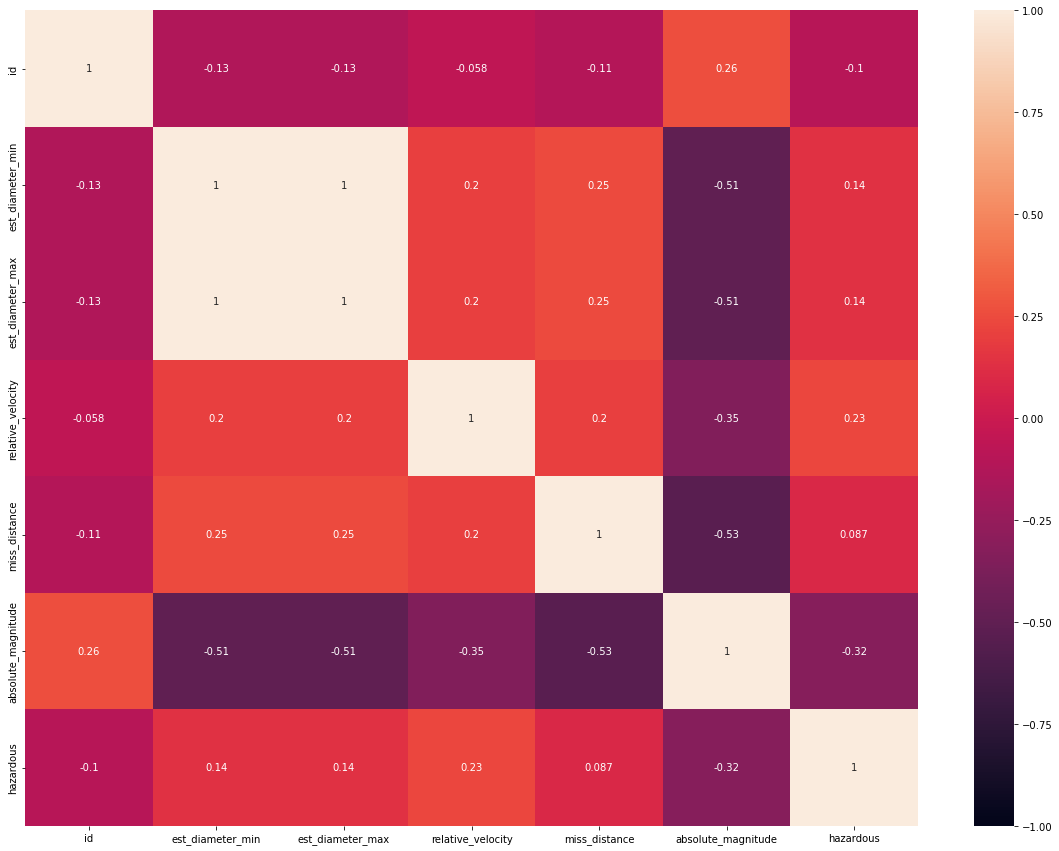

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(neonew.corr(), vmin=-1, vmax=1, annot=True)

In [13]:
# high correlation between 

del neonew['est_diameter_min']

In [14]:
neonew.describe()

,id,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,2.742300e+04,27423.000000,27423.000000,2.742300e+04,27423.000000
mean,1.522211e+07,0.310996,46824.940616,3.047301e+07,23.361668
std,2.137963e+07,0.837229,23357.218062,1.821554e+07,2.869921
min,2.000433e+06,0.001362,646.320239,9.316925e+03,9.230000
25%,3.520758e+06,0.047211,29807.541541,1.386736e+07,21.200000
50%,3.756059e+06,0.113250,42875.644455,3.276135e+07,23.600000
75%,3.968766e+06,0.342011,59651.963633,4.403119e+07,25.500000
max,5.427591e+07,84.730541,236990.128088,7.479865e+07,33.200000


In [15]:
numcol = list(neonew.describe().columns)
numcol

['id',
 'est_diameter_max',
 'relative_velocity',
 'miss_distance',
 'absolute_magnitude']

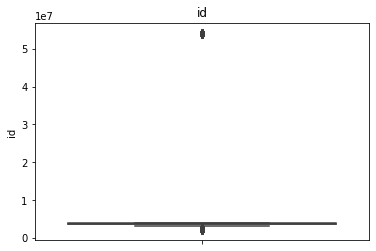

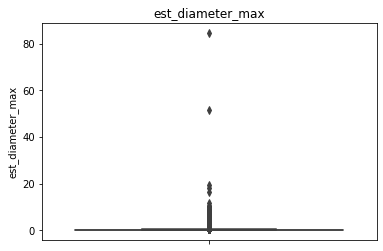

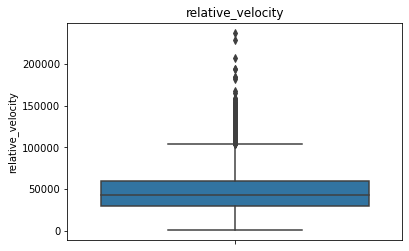

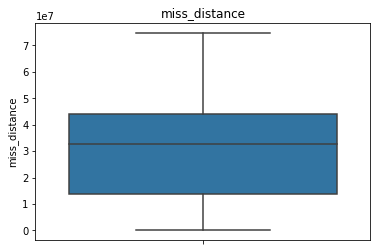

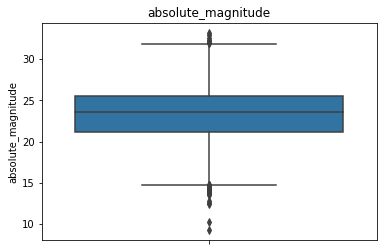

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

for x in numcol:
    sns.boxplot(data = neonew, y=x)
    plt.title(x)
    plt.show()

In [17]:
for x in numcol:
    Q3 = neonew[x].quantile(0.75)
    Q1= neonew[x].quantile(0.25)
    IQR = Q3 - Q1
    filters = neonew[neonew[x]>Q3 + 1.5*IQR]
    print(x)
    print(len(filters))
    print('\n')

id
6356


est_diameter_max
2560


relative_velocity
647


miss_distance
0


absolute_magnitude
8




In [18]:
neonew['hazardous'].value_counts()

False    25250
True      2173
Name: hazardous, dtype: int64

In [19]:
del neonew['id']
del neonew['name']

In [20]:
neonew['hazardous'] = np.where(neonew['hazardous']==True,1,0)


/var/folders/bk/pxkcy9j94652x3trpppgb63m0000gp/T/ipykernel_11420/819059167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neonew['hazardous'] = np.where(neonew['hazardous']==True,1,0)


In [21]:
neonew['hazardous']

0        0
1        1
2        0
3        0
4        1
        ..
90561    0
90608    0
90711    0
90806    0
90823    0
Name: hazardous, Length: 27423, dtype: int64

In [ ]:
"""allcol
for x in allcol:
    sns.displot(neonew, x=x)"""

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [23]:
def generate_results(prediction, y_test, model, x_test):
    print('The accuracy of the Tree is', '{:.3f}'.format(metrics.accuracy_score(prediction,y_test)))

    # matrix

    cm = metrics.plot_confusion_matrix(model, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
    cm.ax_.set_title('Tree Confusion matrix, without normalization');

In [24]:
# feature selection for data including outliers as well
    
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE # feature importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SequentialFeatureSelector

In [25]:
#Data 1

x = neonew.drop('hazardous', axis=1)
y = neonew['hazardous']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

## Fuction of Feature Selection

In [26]:
def feature_selection_SFM(x,y):
    SFM = SelectFromModel(estimator=RandomForestClassifier()).fit(x, y)
    s=SFM.fit(x, y)
    return s.get_support()

In [27]:
def feature_selection_RFE(x,y):
    rfe_selector = RFE(estimator=RandomForestClassifier(),n_features_to_select = 3, step = 1)
    m=rfe_selector.fit(x, y)
    x.columns[m.get_support()]
    return print("Num Features: %s" % (m.n_features_), '\n', "Selected Features: %s" % (m.support_), '\n', "Feature Ranking: %s" % (m.ranking_))

In [28]:
def feature_selection_RFECV(x,y):
    rfecv = RFECV(
        estimator=RandomForestClassifier(),
        min_features_to_select=3,
        step=4,
        n_jobs=-1,
        scoring="r2",
        cv=5,)
    
    m= rfecv.fit(x, y)
    m.ranking_
    return x.columns[rfecv.support_]

In [29]:
def feature_selection_SFS(x,y):
    sfs = SequentialFeatureSelector(estimator=RandomForestClassifier(),  n_features_to_select=3)
    m = sfs.fit(x,y)
    return x.columns[m.get_support()]

In [30]:
allcol = list(neonew.columns)
allcol

['est_diameter_max',
 'relative_velocity',
 'miss_distance',
 'absolute_magnitude',
 'hazardous']

### Run Feature Selection Functions

In [31]:
# SFM
feature_selection_SFM(x,y)  


array([False,  True,  True, False])

In [32]:
#Data 2
mostimcol1 = allcol[2:3]
mostimcol1

x_train2 = x_train[mostimcol1]
x_test2 = x_test[mostimcol1]

In [33]:
#RFE
feature_selection_RFE(x, y)


Num Features: 3 
 Selected Features: [ True  True  True False] 
 Feature Ranking: [1 1 1 2]


In [34]:
#Data 3
mostimcol2 = allcol[:3]
mostimcol2

x_train3 = x_train[mostimcol2]
x_test3 = x_test[mostimcol2]

In [35]:
# RFECV
feature_selection_RFECV(x, y)


Index(['est_diameter_max', 'relative_velocity', 'miss_distance'], dtype='object')

In [36]:
#Data 4
mostimcol3 = allcol[1:4]
mostimcol3

x_train4 = x_train[mostimcol3]
x_test4 = x_test[mostimcol3]

In [37]:
# SFS
feature_selection_SFS(x, y)


Index(['est_diameter_max', 'miss_distance', 'absolute_magnitude'], dtype='object')

In [38]:
#Data 5
mostimcol4 = ['est_diameter_max', 'miss_distance', 'absolute_magnitude']
mostimcol4

x_train5 = x_train[mostimcol4]
x_test5 = x_test[mostimcol4]

# Due to timelimitation and the fact that we only have a limited amount of
# features, we will use our original traindata with all features only for the
# next steps of analysis

## Functions of hyperparameters decision

In [40]:
# hyperparameters decision


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

def HS_Gridsearch(model,dicparam,score, xtrain, ytrain):
    grid_search = GridSearchCV(model,
                               dicparam,cv=5, scoring=score,verbose=1,n_jobs=-1
                               )
    grid_search.fit(xtrain,ytrain)
    grid_search.best_params_
    return print(grid_search.best_params_, grid_search.best_score_)
    
    

def HS_Randomsearch(model,dicparam,score, xtrain, ytrain):
    grid_search = GridSearchCV(model,
                               dicparam,cv=5, scoring=score,verbose=1,n_jobs=-1
                               )
    grid_search.fit(xtrain,ytrain)
    grid_search.best_params_
    return print(grid_search.best_params_, grid_search.best_score_)

# Run hyper parameter function of Random Search for all models

In [43]:
# hyper paramter testing for forest train

dicparam = {'n_estimators':np.arange(100,200,10),'max_features':['sqrt','log2',None],'min_samples_leaf':np.arange(1,5)}

HS_Randomsearch(RandomForestClassifier(), dicparam, score='f1', xtrain=x_train, ytrain=y_train)


# result: {'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 110} 0.37540589163911586
# very bad f1 score --> questionable if 

Fitting 5 folds for each of 120 candidates, totalling 600 fits
{'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 120} 0.37558413352126735


### Hyper paramter testing for logistic regression our research has concluded that there is no necesity to tune the parameters of this model

In [44]:
# hyper parameter testing for NuSVC

from sklearn.svm import NuSVC

d={'nu':np.arange(0,1,0.1)}

HS_Randomsearch(NuSVC(), dicparam = d, score='f1', xtrain=x_train, ytrain=y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/edgartome_1/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/edgartome_1/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/edgartome_1/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Users/edgartome_1/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn/svm/_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: nu <= 0 or nu > 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/edgartome_1/opt/anacond

/Users/edgartome_1/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.15648461        nan        nan        nan        nan
        nan        nan        nan        nan]
  warnings.warn(


{'nu': 0.1} 0.15648460838934128


In [45]:
# hyper parameter Bernoulli

from sklearn.naive_bayes import BernoulliNB

d = {}

HS_Randomsearch(BernoulliNB(), dicparam = {'fit_prior':[True,False]}, score='f1', xtrain=x_train, ytrain=y_train)

# result: {'fit_prior': True} 0.0

Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'fit_prior': True} 0.0


In [49]:
# hyper parameter AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier

HS_Randomsearch(AdaBoostClassifier(), dicparam = {'n_estimators':np.arange(100,200,10)}, score='f1', xtrain=x_train, ytrain=y_train)

# result: 160

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 130} 0.22787392658341982


In [50]:
# hyper parameter passive agressive

from sklearn.linear_model import PassiveAggressiveClassifier

HS_Randomsearch(PassiveAggressiveClassifier(), dicparam = {'fit_intercept':[True,False],'max_iter':[1000,2000,3000]}, score='f1', xtrain=x_train, ytrain=y_train)

# result: {'fit_intercept': True, 'max_iter': 2000} 0.023195266272189347

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'fit_intercept': True, 'max_iter': 2000} 0.04856594874012501


In [51]:
# hyper parameter SGDClassifier

from sklearn.linear_model import SGDClassifier

HS_Randomsearch(SGDClassifier(), dicparam = {'fit_intercept':[True,False],'max_iter':[1000,2000,3000]}, score='f1', xtrain=x_train, ytrain=y_train)

# result: {'fit_intercept': False, 'max_iter': 1000} 0.030345736920034155

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'fit_intercept': True, 'max_iter': 2000} 0.031361381728568075


In [52]:
#hyper parameter ComplementNB

from sklearn.naive_bayes import ComplementNB

HS_Randomsearch(ComplementNB(), dicparam = {'norm':[True,False], 'fit_prior':[True,False]}, score='f1', xtrain=x_train, ytrain=y_train)

# result: {'fit_prior': True, 'norm': False} 0.16874863841491952

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'fit_prior': True, 'norm': False} 0.16940776896844667


# Testing our models one by one

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5056
           1       0.00      0.00      0.00       429

    accuracy                           0.92      5485
   macro avg       0.46      0.50      0.48      5485
weighted avg       0.85      0.92      0.88      5485

The accuracy of the Tree is 0.922


/Users/edgartome_1/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edgartome_1/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edgartome_1/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


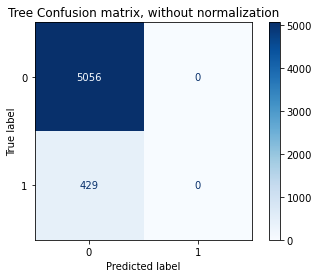

In [53]:
#Test model Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
result = model.fit(x_train,y_train)
prediction = result.predict(x_test)

print(classification_report(y_test,prediction))
generate_results(prediction,y_test,model,x_test)

              precision    recall  f1-score   support

           0       0.92      0.29      0.44      5056
           1       0.08      0.69      0.14       429

    accuracy                           0.32      5485
   macro avg       0.50      0.49      0.29      5485
weighted avg       0.85      0.32      0.42      5485

The accuracy of the Tree is 0.323


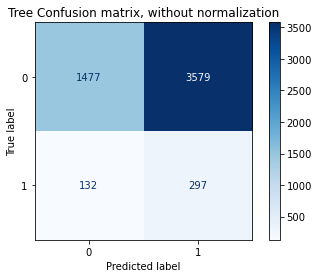

In [54]:
#Test model NuSVC BEST

from sklearn.svm import NuSVC

model = NuSVC(nu=0.1)
result = model.fit(x_train,y_train)
prediction = result.predict(x_test)

print(classification_report(y_test,prediction))
generate_results(prediction,y_test,model,x_test)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5056
           1       0.00      0.00      0.00       429

    accuracy                           0.92      5485
   macro avg       0.46      0.50      0.48      5485
weighted avg       0.85      0.92      0.88      5485

The accuracy of the Tree is 0.922


/Users/edgartome_1/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edgartome_1/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edgartome_1/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


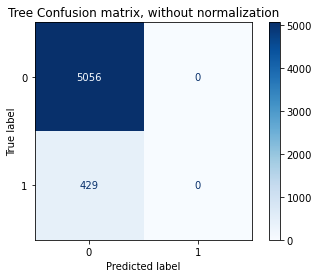

In [55]:
#Test model BernoulliNB

model = BernoulliNB(fit_prior=True)
result = model.fit(x_train,y_train)
prediction = result.predict(x_test)

print(classification_report(y_test,prediction))
generate_results(prediction,y_test,model,x_test)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5056
           1       0.00      0.00      0.00       429

    accuracy                           0.92      5485
   macro avg       0.46      0.50      0.48      5485
weighted avg       0.85      0.92      0.88      5485

The accuracy of the Tree is 0.922


/Users/edgartome_1/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edgartome_1/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edgartome_1/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


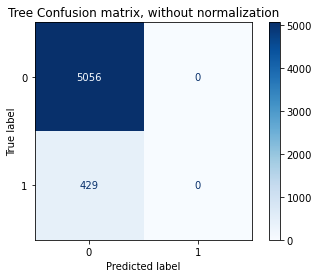

In [56]:
#Test model wirh a different data set, from feature selection RFE, Data 3

model = BernoulliNB(fit_prior=True)
result = model.fit(x_train3,y_train)
prediction = result.predict(x_test3)

print(classification_report(y_test,prediction))
generate_results(prediction,y_test,model,x_test3)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5056
           1       0.60      0.12      0.21       429

    accuracy                           0.93      5485
   macro avg       0.77      0.56      0.58      5485
weighted avg       0.90      0.93      0.90      5485

The accuracy of the Tree is 0.925


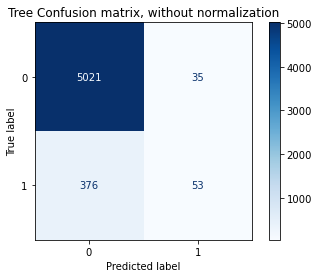

In [57]:
#Test model AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=160)
result = model.fit(x_train,y_train)
prediction = result.predict(x_test)

print(classification_report(y_test,prediction))
generate_results(prediction,y_test,model,x_test)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5056
           1       0.00      0.00      0.00       429

    accuracy                           0.92      5485
   macro avg       0.46      0.50      0.48      5485
weighted avg       0.85      0.92      0.88      5485

The accuracy of the Tree is 0.922


/Users/edgartome_1/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edgartome_1/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edgartome_1/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


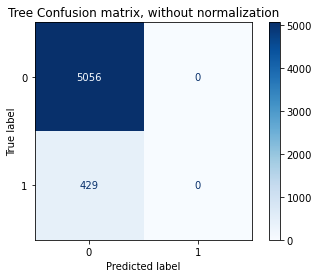

In [58]:
#Test model PassiveAggressiveClassifier

model = PassiveAggressiveClassifier(fit_intercept= True,max_iter= 2000)
result = model.fit(x_train,y_train)
prediction = result.predict(x_test)

print(classification_report(y_test,prediction))
generate_results(prediction,y_test,model,x_test)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5056
           1       0.00      0.00      0.00       429

    accuracy                           0.92      5485
   macro avg       0.46      0.50      0.48      5485
weighted avg       0.85      0.92      0.88      5485

The accuracy of the Tree is 0.917


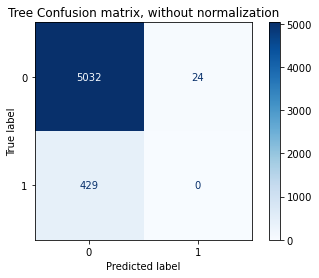

In [59]:
#Test model SGDClassifier

model = SGDClassifier(fit_intercept= False,max_iter= 1000)
result = model.fit(x_train,y_train)
prediction = result.predict(x_test)

print(classification_report(y_test,prediction))
generate_results(prediction,y_test,model,x_test)

              precision    recall  f1-score   support

           0       0.94      0.57      0.71      5056
           1       0.10      0.56      0.17       429

    accuracy                           0.57      5485
   macro avg       0.52      0.56      0.44      5485
weighted avg       0.87      0.57      0.67      5485

The accuracy of the Tree is 0.567


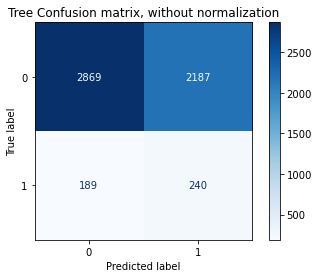

In [60]:
#Test model ComplementNB

model = ComplementNB(norm=False, fit_prior=True)
result = model.fit(x_train,y_train)
prediction = result.predict(x_test)

print(classification_report(y_test,prediction))
generate_results(prediction,y_test,model,x_test)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5056
           1       1.00      0.03      0.07       429

    accuracy                           0.92      5485
   macro avg       0.96      0.52      0.51      5485
weighted avg       0.93      0.92      0.89      5485

The accuracy of the Tree is 0.925


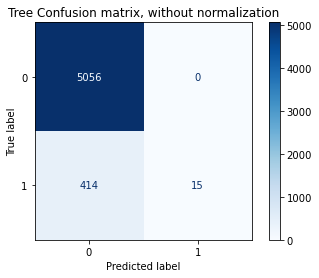

In [61]:
#Test model GaussianProcessClassifier

from sklearn.gaussian_process import GaussianProcessClassifier

model = GaussianProcessClassifier(n_jobs=-1)
result = model.fit(x_train,y_train)
prediction = result.predict(x_test)

print(classification_report(y_test,prediction))
generate_results(prediction,y_test,model,x_test)